In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import SMOTE


In [59]:
df = pd.read_csv(r"data\BankChurners_preprocessed.csv")


In [60]:
# Define the feature matrix X and the target vector y
X = df.drop(['Attrition_Flag'], axis=1)
y = df['Attrition_Flag']

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X,y)

X_train, X_test, y_train, y_test= train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)


# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# Create the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

In [62]:
# Evaluate the Random Forest model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
classification_rep = classification_report(y_test, y_pred)

# Calculate FPR, TPR, and Thresholds for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_classifier.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

print("")
print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)
print("\nROC AUC:\n", roc_auc)



Accuracy: 0.9794117647058823

Confusion Matrix:
 Predicted     0     1   All
Actual                     
0          1699    25  1724
1            45  1631  1676
All        1744  1656  3400

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1724
           1       0.98      0.97      0.98      1676

    accuracy                           0.98      3400
   macro avg       0.98      0.98      0.98      3400
weighted avg       0.98      0.98      0.98      3400


ROC AUC:
 0.997649877622668


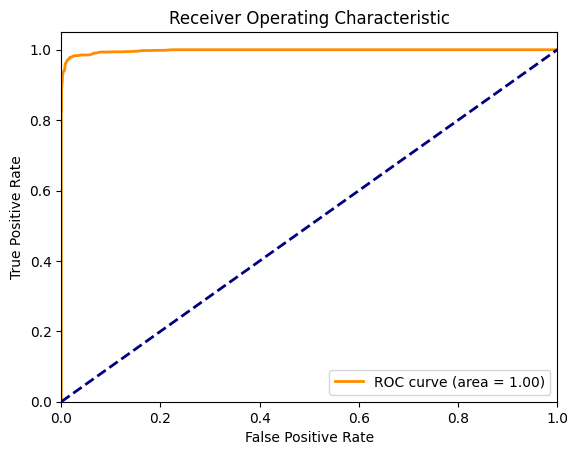

In [63]:
# Predict probabilities for the test set
y_probs = rf_classifier.predict_proba(X_test)[:, 1]  # probabilities for the positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [64]:
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature rankings
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {indices[f]} ({importances[indices[f]]}) - {X_train.columns[indices[f]]}")


Feature ranking:
1. feature 15 (0.215561455249421) - Total_Trans_Ct
2. feature 14 (0.2120347063616737) - Total_Trans_Amt
3. feature 11 (0.09514503810943764) - Total_Revolving_Bal
4. feature 16 (0.0808951596581696) - Total_Ct_Chng_Q4_Q1
5. feature 17 (0.06795203946346358) - Avg_Utilization_Ratio
6. feature 7 (0.06142667934656519) - Total_Relationship_Count
7. feature 13 (0.053674114318813936) - Total_Amt_Chng_Q4_Q1
8. feature 12 (0.02692100837997064) - Avg_Open_To_Buy
9. feature 10 (0.026591849983489978) - Credit_Limit
10. feature 0 (0.02393260428456429) - Customer_Age
11. feature 18 (0.023705591852329778) - Marital_Status_Married
12. feature 1 (0.02031827590130444) - Gender
13. feature 8 (0.01700844359018034) - Months_Inactive_12_mon
14. feature 6 (0.015885294500518028) - Months_on_book
15. feature 19 (0.012506389701990337) - Marital_Status_Single
16. feature 9 (0.012474473512886868) - Contacts_Count_12_mon
17. feature 2 (0.009567551376473459) - Dependent_count
18. feature 3 (0.0091177

Cross-Validation Scores: [0.88499506 0.96396841 0.96444444 0.96790123 0.84790123]
Mean CV Score: 0.9258420776814986
Standard Deviation in CV Scores: 0.04991189477989577


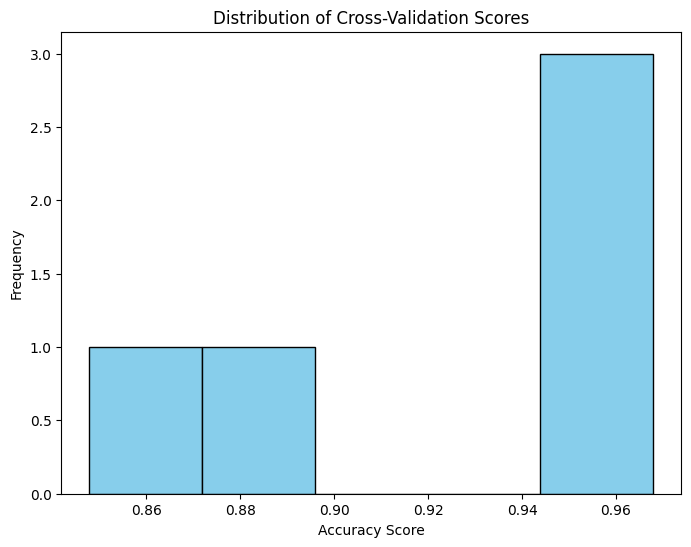

In [65]:
# Perform enhanced cross-validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation

# Calculate mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

# Print detailed cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", mean_cv_score)
print("Standard Deviation in CV Scores:", std_cv_score)

# Plotting the distribution of cross-validation scores
plt.figure(figsize=(8, 6))
plt.hist(cv_scores, bins=5, color='skyblue', edgecolor='black')
plt.title('Distribution of Cross-Validation Scores')
plt.xlabel('Accuracy Score')
plt.ylabel('Frequency')
plt.show()
